In [101]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [102]:
df=pd.read_csv(r"C:\Users\user\Downloads\Titanic.csv")


In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
#Our target feature (also known as the independent variable) is the Survived column, which is 1 if the person survived and 0 if not. 

In [104]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Age has a count less than the total number of columns, which means there are some missing values (indicated by NaN).

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
#there are 7 numerical columns (floats and integers), 5 non-numerical columns, and their names as well. The output also tells us there are 891 rows/entries and 12 columns.

In [107]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [12]:
df.shape

(891, 12)

In [13]:
df.size

10692

In [14]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [129]:

print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Handling missing values

In [131]:

df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages with median


In [133]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Fill missing embarkation points with mode

In [134]:
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)  # Drop unnecessary columns

In [135]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [136]:
# Encoding categorical variables
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})


In [137]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,3
887,888,1,1,0,19.0,0,0,30.0000,3
888,889,0,3,0,28.0,1,2,23.4500,3
889,890,1,1,1,26.0,0,0,30.0000,1


# count of survived passengers 

In [114]:
 df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [115]:

var1 = df.Survived.value_counts()
var1

Survived
0    549
1    342
Name: count, dtype: int64

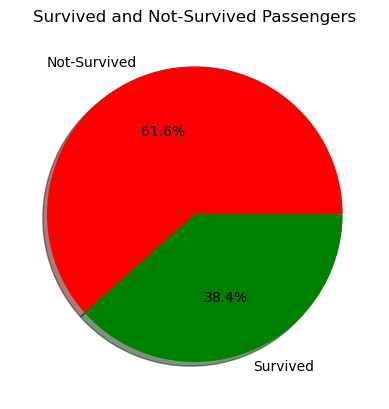

In [116]:
plt.pie(var1, shadow=True, autopct="%0.1f%%", labels = ["Not-Survived", "Survived"], colors = ["r", 'g'])
plt.title("Survived and Not-Survived Passengers")
plt.show()

#   female passengers who travelled in first class 

In [18]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
df_female = df[df.Sex == "female"]

In [20]:
var2 = df_female.Pclass.value_counts()
var2

Pclass
3    144
1     94
2     76
Name: count, dtype: int64

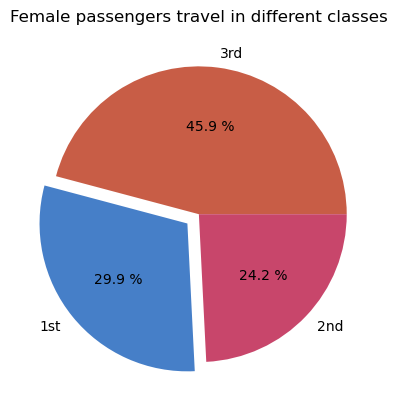

In [146]:
plt.pie(var2, colors = ["#c85d46", "#467fc8", "#c8466b"], labels = ["3rd", "1st", "2nd"], autopct = "%0.01f %%",
       explode=(0, 0.1, 0))
plt.title("Female passengers travel in different classes")
plt.show()

# Distribution of Age

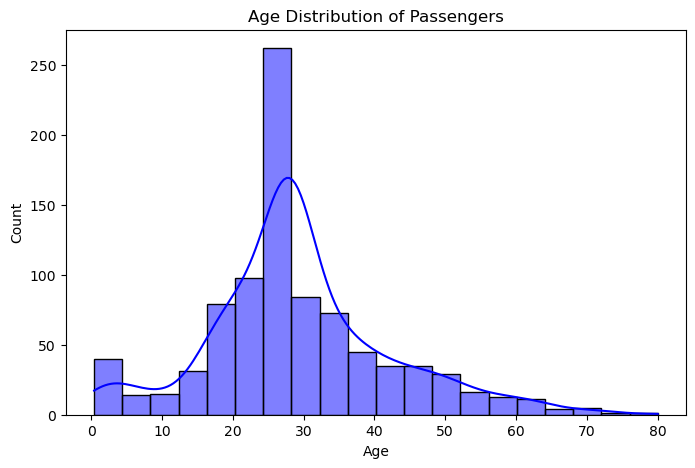

In [138]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [118]:
#This histogram shows the distribution of passenger ages, allowing us to understand the age spread

# Survival by Gender

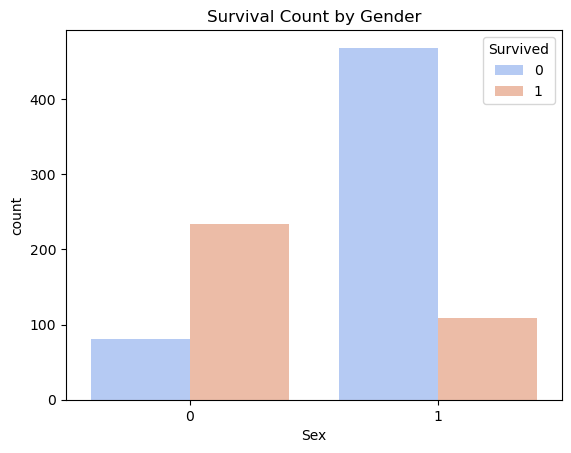

In [139]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Gender")
plt.show()

In [140]:
#This bar chart demonstrates survival rates by gender, indicating whether survival chances were different for men and women.

# Boxplot of Age by Survived status

C:\Users\user\AppData\Local\Temp\ipykernel_22852\3612252203.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')


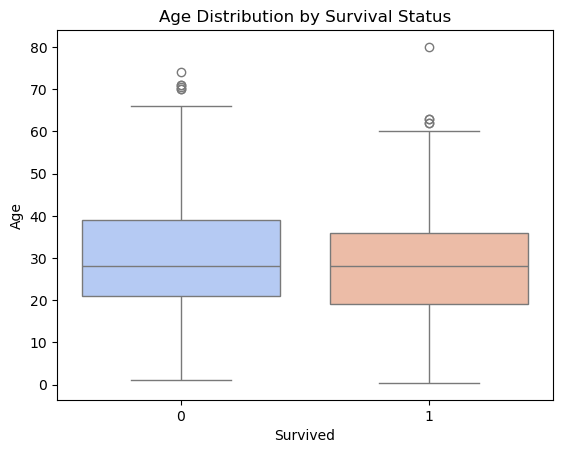

In [119]:

sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')
plt.title("Age Distribution by Survival Status")
plt.show()

In [ ]:
#The boxplot shows the age distribution of survivors versus non-survivors, highlighting medians and outliers.


# Countplot of Passenger Class

C:\Users\user\AppData\Local\Temp\ipykernel_22852\1933067671.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='coolwarm')


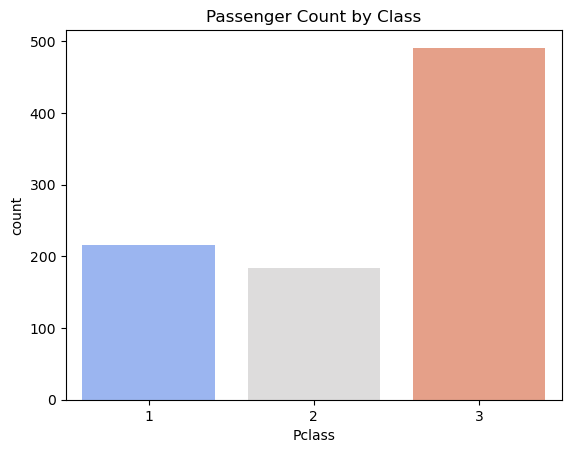

In [120]:

sns.countplot(data=df, x='Pclass', palette='coolwarm')
plt.title("Passenger Count by Class")
plt.show()

In [121]:
#This bar plot displays the number of passengers in each class, with more passengers in lower classes.

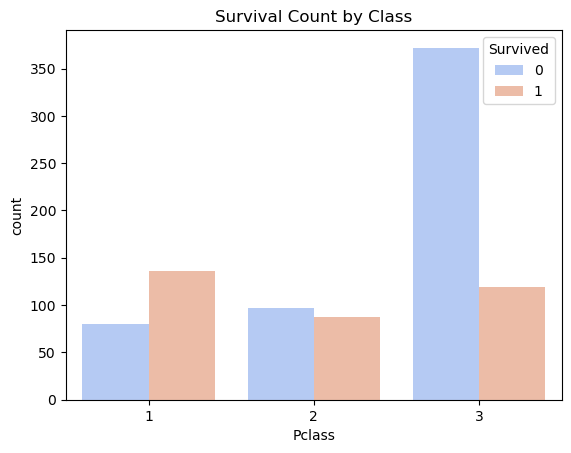

In [141]:
# Survival by Class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Class")
plt.show()

In [142]:
# This visualization shows how survival rates varied by passenger class, revealing potential socioeconomic disparities.

# Pairplot of key numerical features

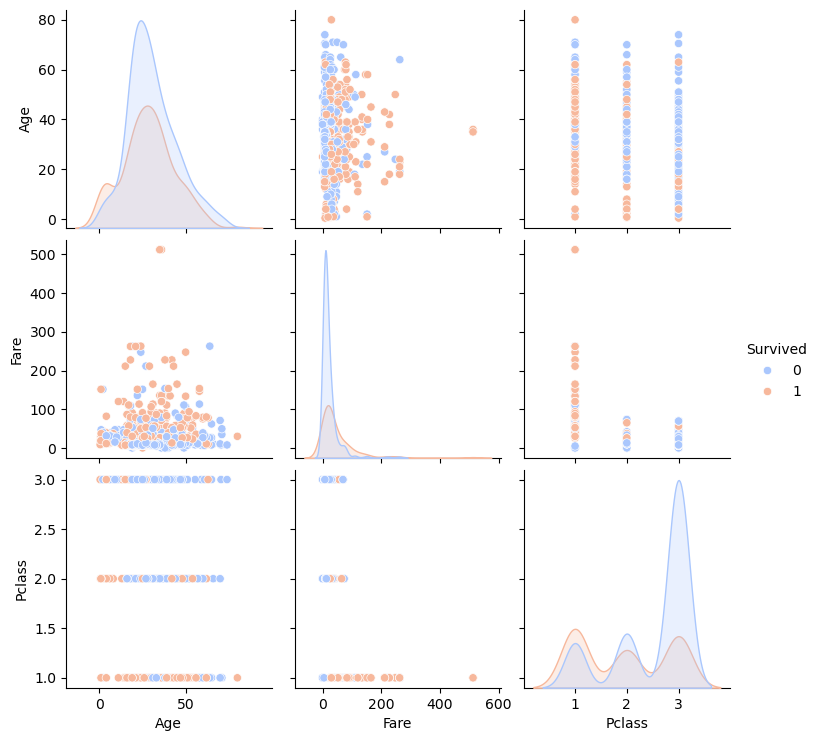

In [122]:

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.show()

In [ ]:
# This pairplot helps to identify relationships between variables, distinguishing survivors from non-survivors.

# Correlation Heatmap

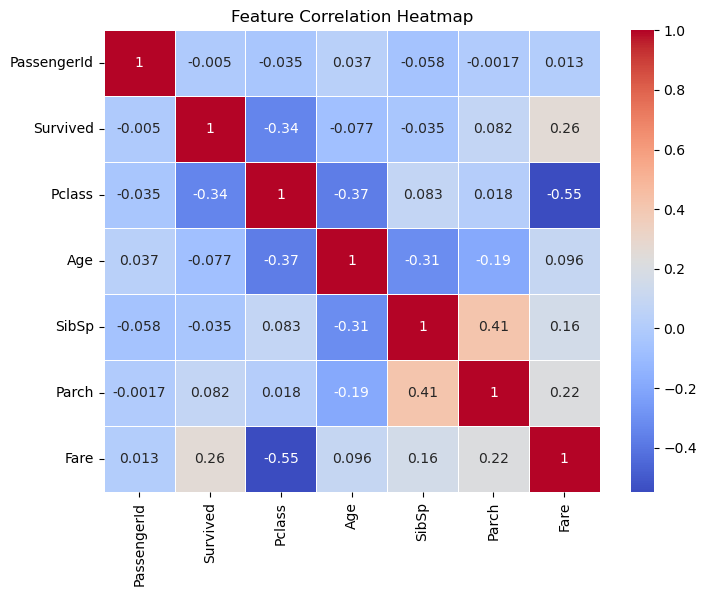

In [124]:

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Violin plot of Fare by Class

C:\Users\user\AppData\Local\Temp\ipykernel_22852\3488294132.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Fare', data=df, palette='muted')


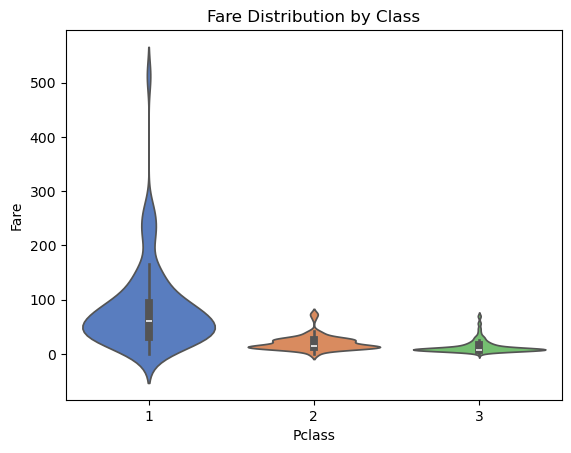

In [126]:

sns.violinplot(x='Pclass', y='Fare', data=df, palette='muted')
plt.title("Fare Distribution by Class")
plt.show()


In [ ]:
#This violin plot shows the fare distribution across different passenger classes, emphasizing density.

# Scatter plot of Fare vs Age


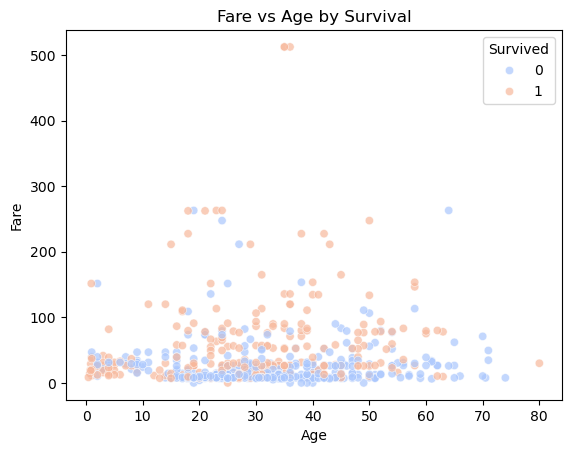

In [127]:

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm', alpha=0.7)
plt.title("Fare vs Age by Survival")
plt.show()

In [128]:
#This scatter plot shows how age and fare influence survival, with higher fares often linked to survival

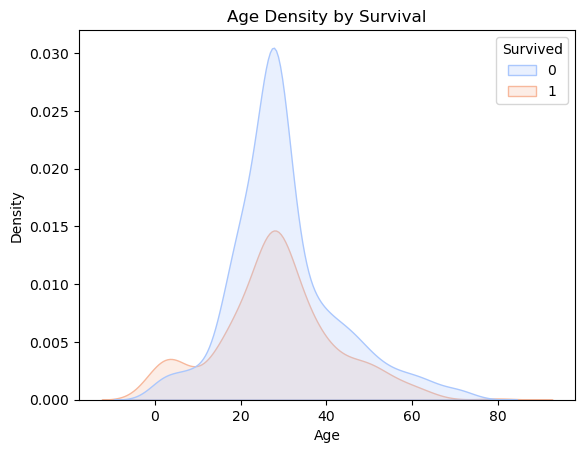

In [143]:
# KDE Plot of Age by Survival
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, palette='coolwarm')
plt.title("Age Density by Survival")
plt.show()

In [144]:
#This density plot shows how the age distribution differs between survivors and non-survivors

#   female passengers who had Survived and  age <30

In [22]:
df_female[df_female.Age<30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [23]:
df_f_a = df[(df.Age<30) & (df.Sex=="female")]
var3 = df_f_a.Survived.value_counts()
var3

Survived
1    105
0     42
Name: count, dtype: int64

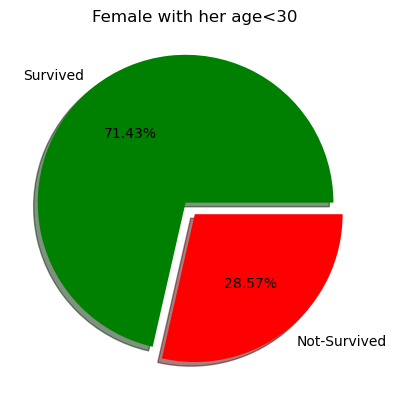

In [24]:
plt.pie(var3, shadow=True, autopct="%0.2f%%", labels = ["Survived", "Not-Survived"], colors = ["g", 'r'], explode = (0.1, 0))
plt.title("Female with her age<30")
plt.show()

#  male passengers who had Survived and his age >40

In [25]:
df_m_a = df[(df.Age>40) & (df.Sex=="male")]
var4 = df_m_a.Survived.value_counts()
var4

Survived
0    84
1    18
Name: count, dtype: int64

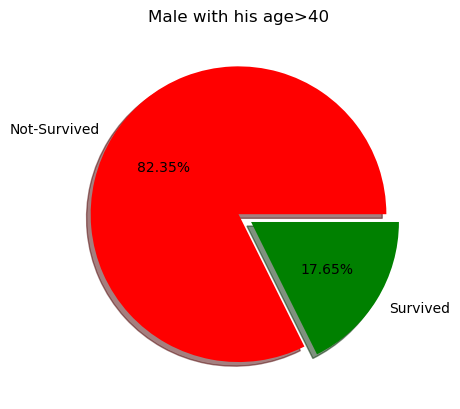

In [26]:
plt.pie(var4, shadow=True, autopct="%0.2f%%", labels = ["Not-Survived", "Survived"], colors = ["r", 'g'], explode = (0, 0.1))
plt.title("Male with his age>40")
plt.show()

#  age with 20 bins

In [28]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# age frequency with survived and not survived (Histogram)

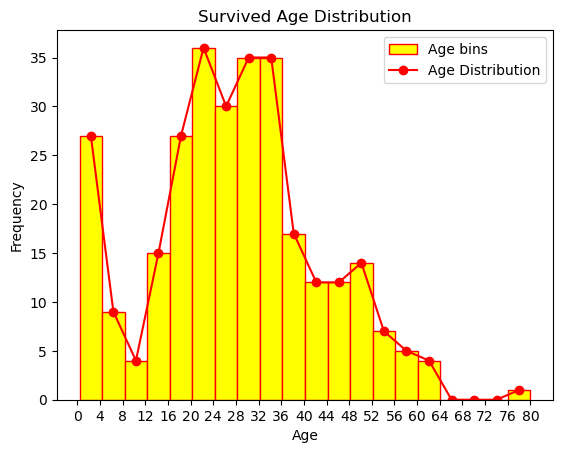

In [125]:
var5 = df[df.Survived == 1].Age

counts, bins, _ = plt.hist(var5, bins = 20, color = "yellow", edgecolor = "red", label = "Age bins")
bin_centers = (bins[:-1]+ bins[1:])/2
plt.plot(bin_centers, counts, marker = 'o', color="r", label = "Age Distribution")
plt.xticks(np.arange(0, 84, 4))
plt.title("Survived Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Bar graph for Survived with male, female, class

In [35]:
s_df = df[df.Survived == 1]

In [36]:
s_df.Sex.value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [37]:
s_df.Pclass.value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [38]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='count'>

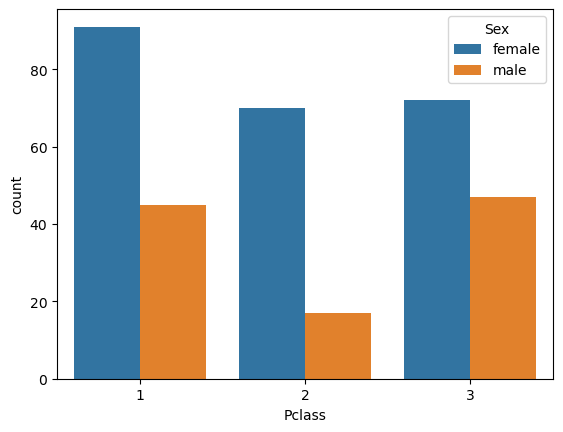

In [39]:
sns.countplot(x = "Pclass", hue = "Sex", data = s_df)

# no of  passengers who  travelled in different classes 

In [46]:
temp = df.Pclass.value_counts()
temp

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [48]:
value = list(temp)
value


[491, 216, 184]

In [51]:
data = dict(temp)
x = data.keys()
count = data.values()
count

dict_values([491, 216, 184])

In [52]:
import matplotlib.pyplot as plt

In [53]:
val = []
for i in x:
    if i ==1:
        val.append("1st Class")
    elif i==2:
        val.append("2nd Class")
    elif i==3:
        val.append("3rd Class")

In [54]:
x

dict_keys([3, 1, 2])

In [55]:
count

dict_values([491, 216, 184])

In [56]:
print(val)

['3rd Class', '1st Class', '2nd Class']


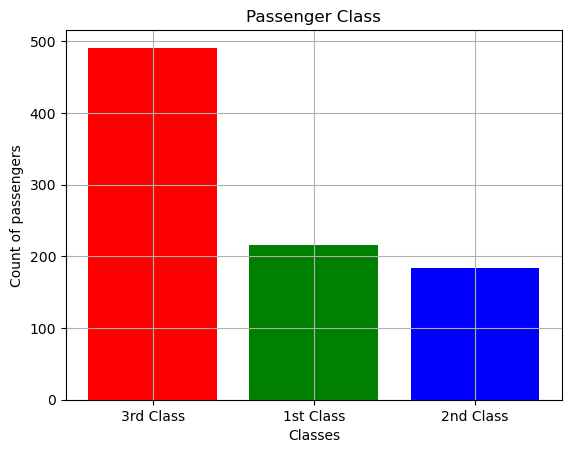

In [57]:
plt.bar(val, count, color=["red", "green", "blue"])
plt.title("Passenger Class")
plt.xlabel("Classes")
plt.ylabel("Count of passengers")
plt.grid()
plt.show()

# Bar graph for Survived with 3rd class male, 1st class female

In [63]:
df[(df.Pclass == 3) & (df.Sex == "male")].Survived.value_counts()

Survived
0    300
1     47
Name: count, dtype: int64

<Axes: xlabel='Survived'>

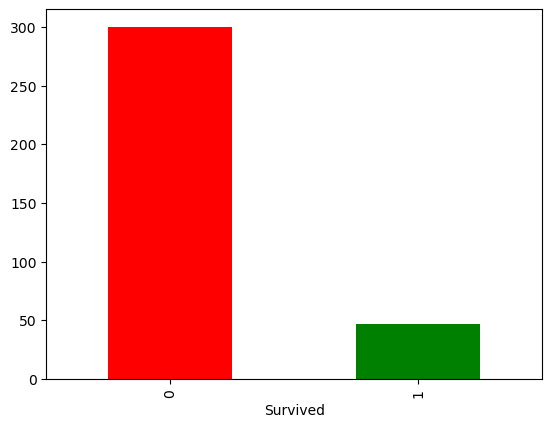

In [64]:
df[(df.Pclass == 3) & (df.Sex == "male")].Survived.value_counts().plot(kind = "bar", color= ["r", "g"])

<Axes: xlabel='Survived'>

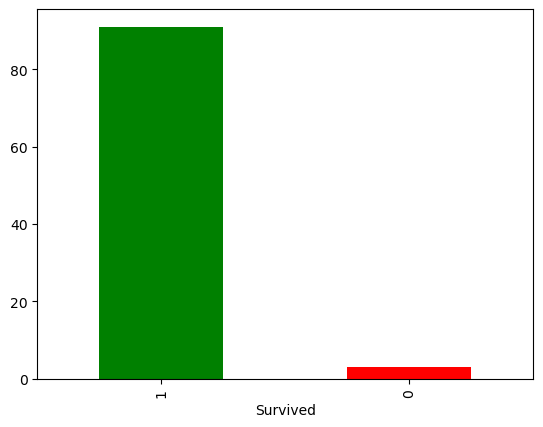

In [65]:
df[(df.Pclass == 1) & (df.Sex == "female")].Survived.value_counts().plot(kind = "bar", color= ["g", "r"])

# passengers are survived / not survived and they are 1st class female

In [68]:
df[(df.Pclass == 1) & (df.Sex == "female")].Survived.value_counts()

Survived
1    91
0     3
Name: count, dtype: int64

In [69]:
pd.crosstab(df["Pclass"], df["Sex"])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [70]:
pd.crosstab(df["Pclass"], df["Sex"], margins= True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


# Subplots 

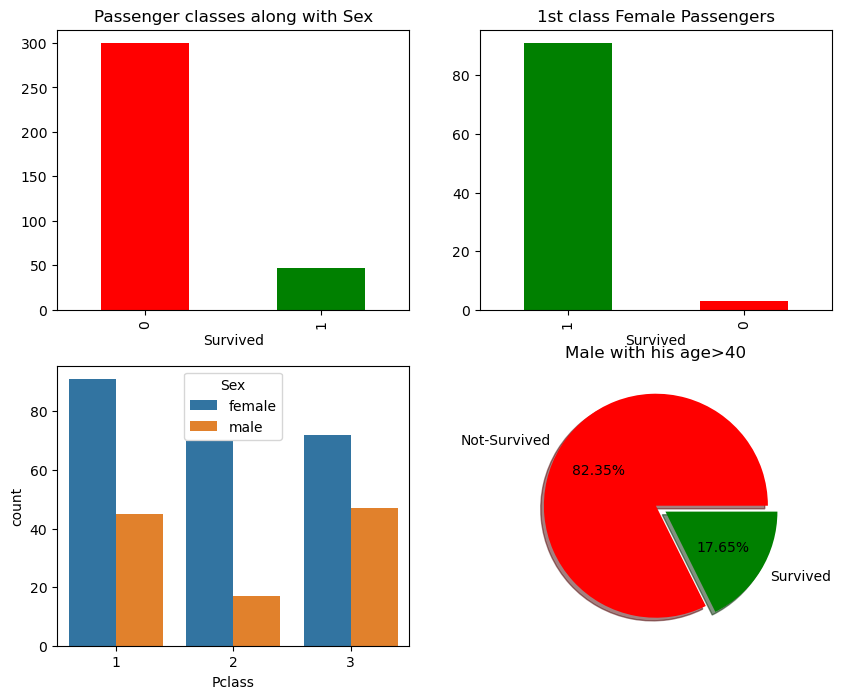

In [72]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

var1 = df[(df.Pclass == 3) & (df.Sex == "male")].Survived.value_counts()
var1.plot(kind = "bar", color= ["r", "g"], ax = axs[0][0])
axs[0][0].set_title("3rd class Male Passengers")


var1 = df[(df.Pclass == 1) & (df.Sex == "female")].Survived.value_counts()
var1.plot(kind = "bar", color= ["g", "r"], ax = axs[0][1])
axs[0][1].set_title("1st class Female Passengers")


sns.countplot(x = "Pclass", hue = "Sex", data = df[df.Survived == 1], ax = axs[1,0])
axs[0][0].set_title("Passenger classes along with Sex")


var4 = df[(df.Sex == "male") & (df.Age>40)].Survived.value_counts()
axs[1][1].pie(var4, shadow=True, autopct="%0.2f%%", labels = ["Not-Survived", "Survived"], colors = ["r", 'g'], explode = (0, 0.1))
axs[1][1].set_title("Male with his age>40")


plt.show()

# the Sex column male=1, female =0


In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.Sex = df.Sex.map({"male":1, "female":0})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",NaN,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",NaN,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",NaN,26.0,0,0,111369,30.0000,C148,C


###  Label Encoder

In [78]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()

In [81]:
df["Embarked"] = le.fit_transform(df["Embarked"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",NaN,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",NaN,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",NaN,26.0,0,0,111369,30.0000,C148,0


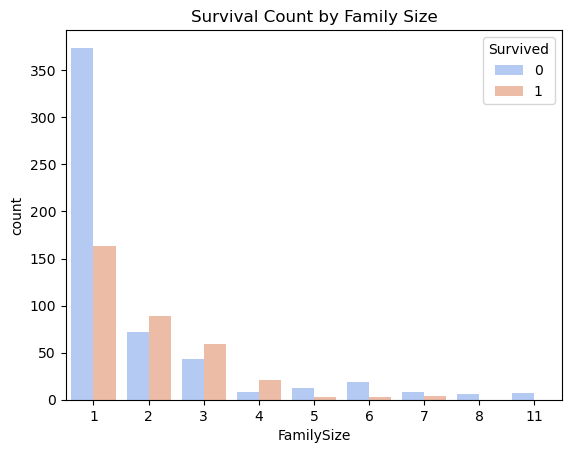

In [145]:
 #Feature Engineering - Creating Family Size Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Family Size")
plt.show()